# Hypertuning Progress Analyzer

*   Jacob Yousif

## Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%capture
!pip install seaborn

In [3]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
import ast

## Loading the data

In [4]:
plots_dir = 'Plots/Progress/'

In [5]:
file_path = 'Datasets/XGBoostHypertuningProcess.csv'
df = pd.read_csv(file_path)
df['Params'] = df['Params'].apply(ast.literal_eval)

## Analysis

In [6]:
seconds = df['Duration'].sum()

In [7]:
print('In seconds, the hypertuning process duration is:', int(seconds), 'seconds.')

In seconds, the hypertuning process duration is: 25212 seconds.


In [8]:
minutes = int(seconds / 60)

In [9]:
print('In minutes, the hypertuning process duration is:', minutes, 'minutes.')

In minutes, the hypertuning process duration is: 420 minutes.


In [10]:
hours = round(seconds / 3600, 1)

In [11]:
print('in hours, the hypertuning process duration is:', hours, 'hours.')

in hours, the hypertuning process duration is: 7.0 hours.


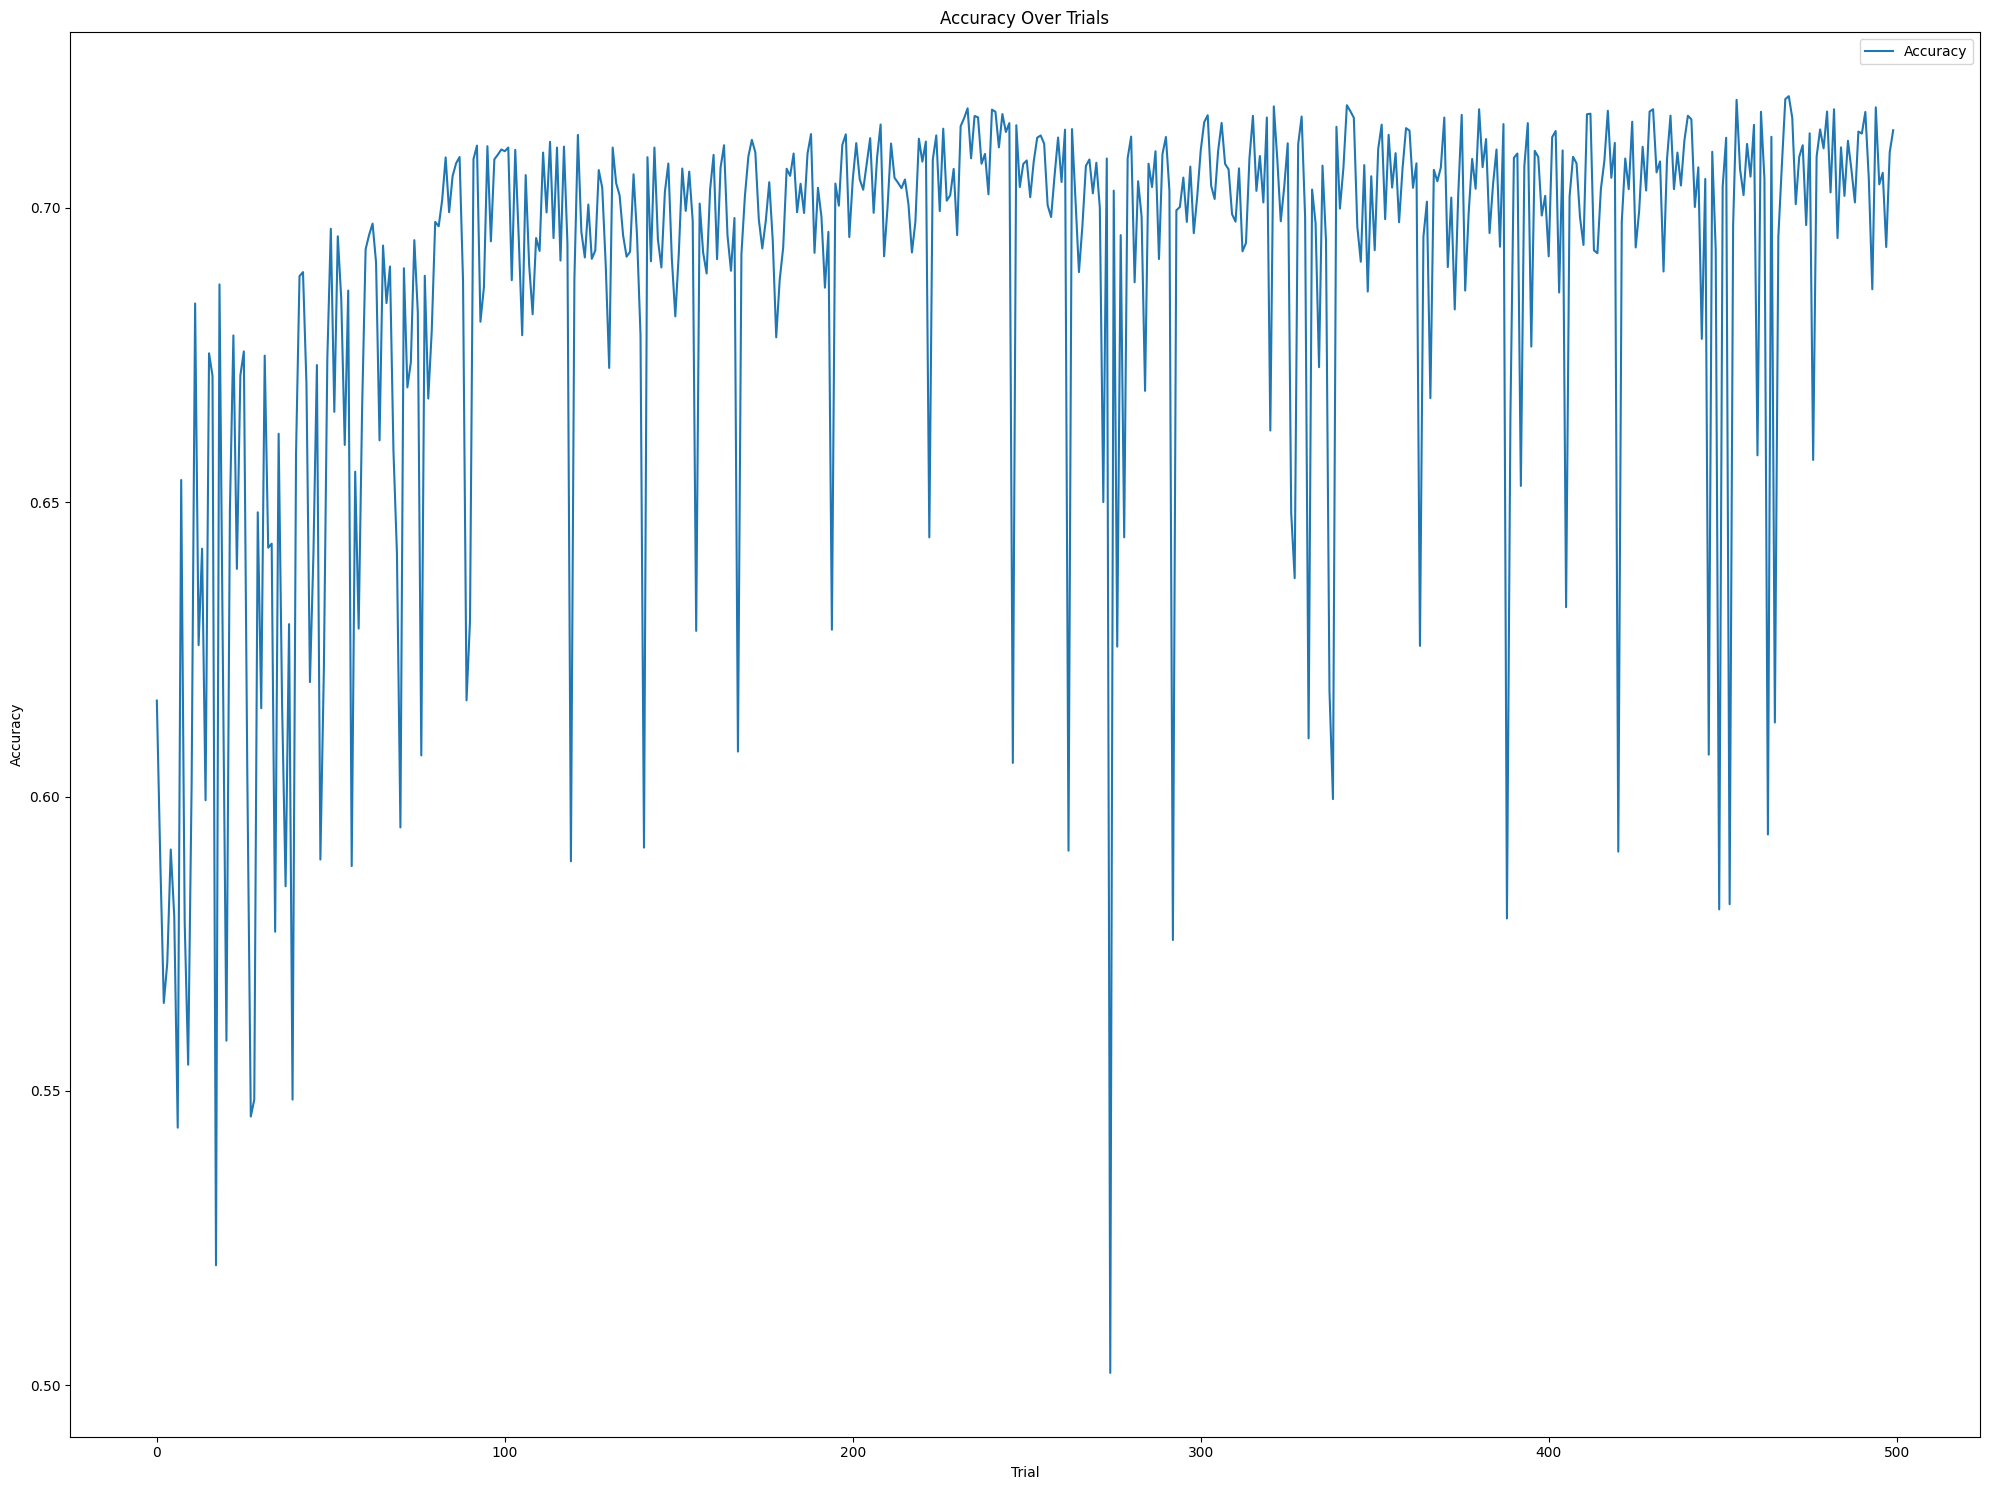

In [12]:
plt.figure(figsize=(20, 15))
plt.plot(df['Trial'], df['Accuracy'], label='Accuracy')
plt.xlabel('Trial')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Trials')
plt.legend()
plt.tight_layout()
plt.savefig(f'{plots_dir}AccuracyOverTrials.pdf', bbox_inches='tight')
plt.show()

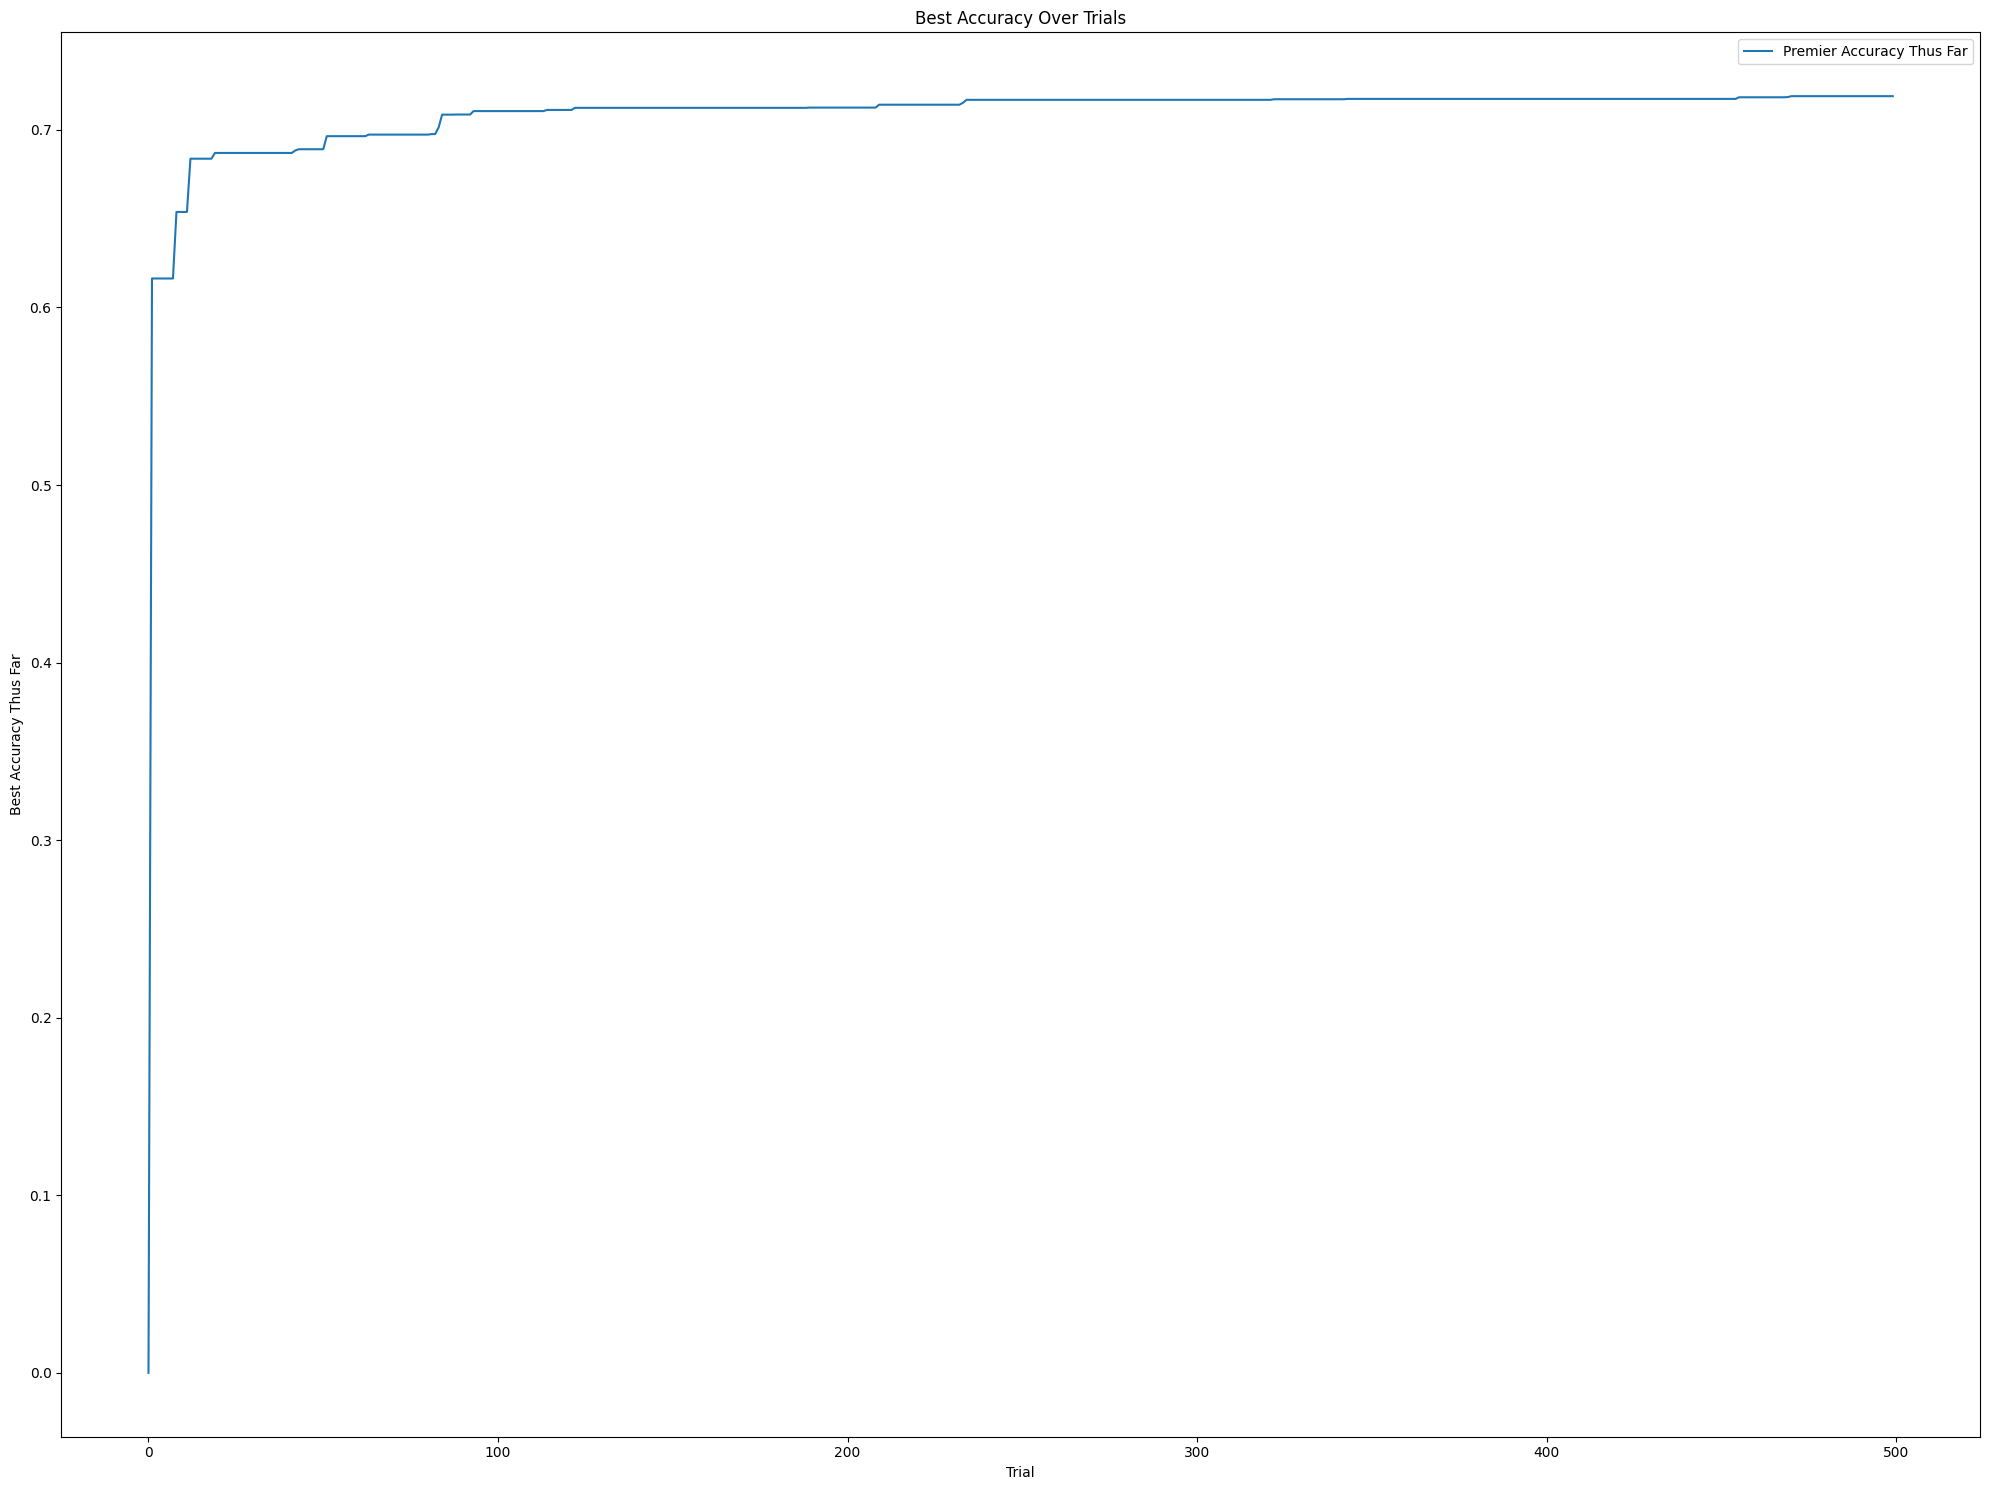

In [13]:
plt.figure(figsize=(20, 15))
plt.plot(df['Trial'], df['BestAccuracy'], label='Premier Accuracy Thus Far')
plt.xlabel('Trial')
plt.ylabel('Best Accuracy Thus Far')
plt.title('Best Accuracy Over Trials')
plt.legend()
plt.tight_layout()
plt.savefig(f'{plots_dir}BestAccuracyOverTrials.pdf', bbox_inches='tight')
plt.show()

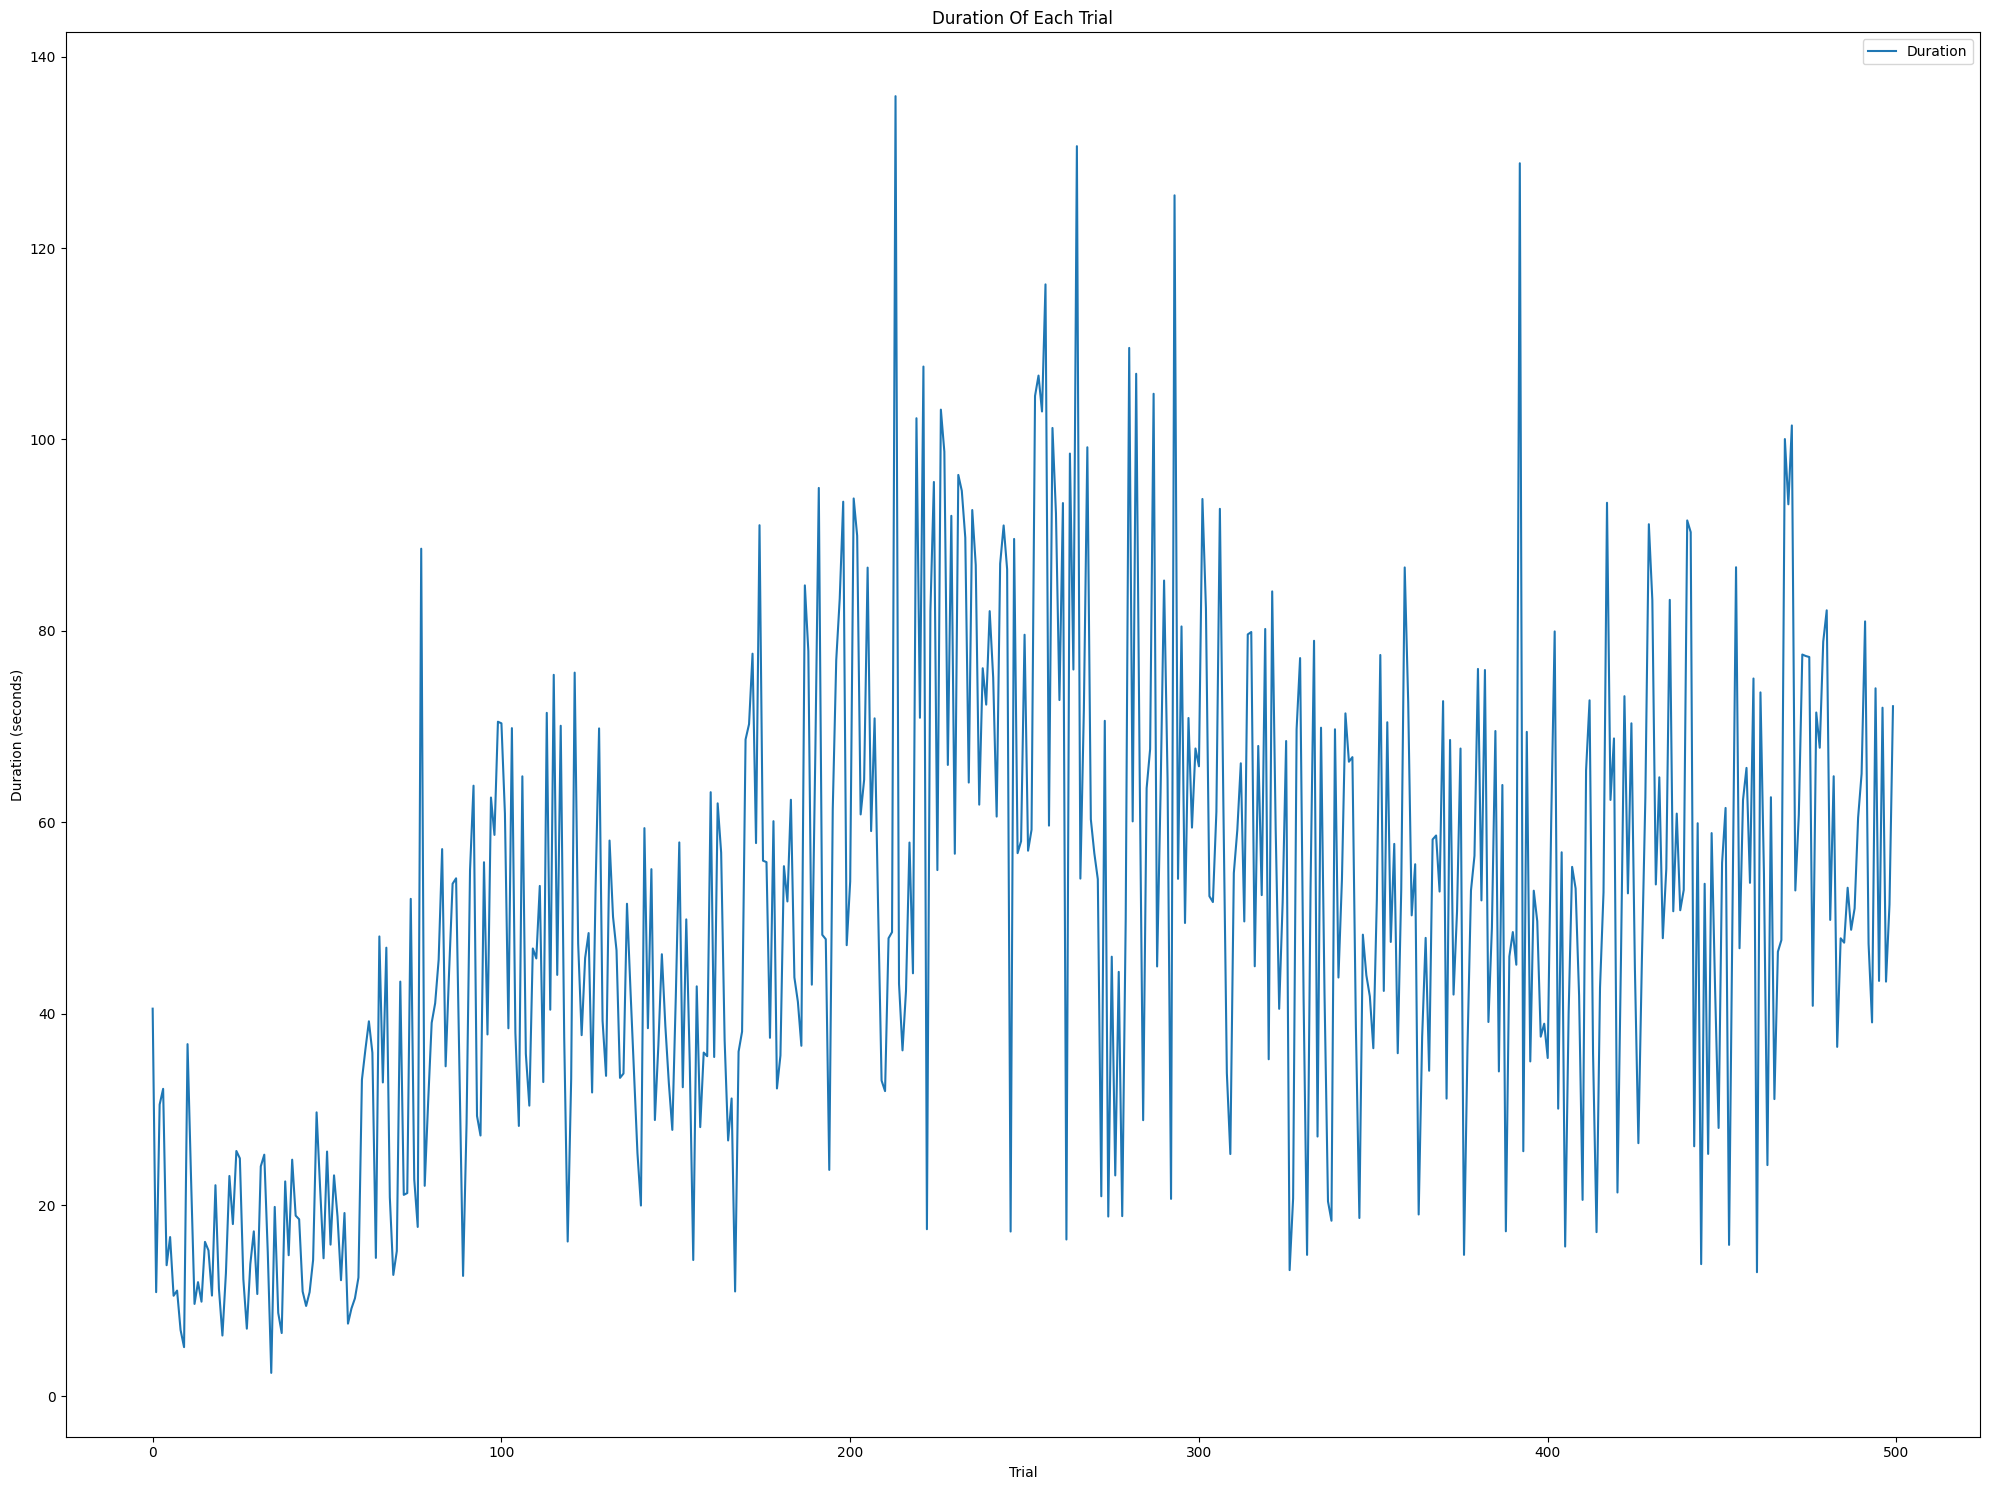

In [14]:
plt.figure(figsize=(20, 15))
plt.plot(df['Trial'], df['Duration'], label='Duration')
plt.xlabel('Trial')
plt.ylabel('Duration (seconds)')
plt.title('Duration Of Each Trial')
plt.legend()
plt.tight_layout()
plt.savefig(f'{plots_dir}DurationOfEachTrial.pdf', bbox_inches='tight')
plt.show()

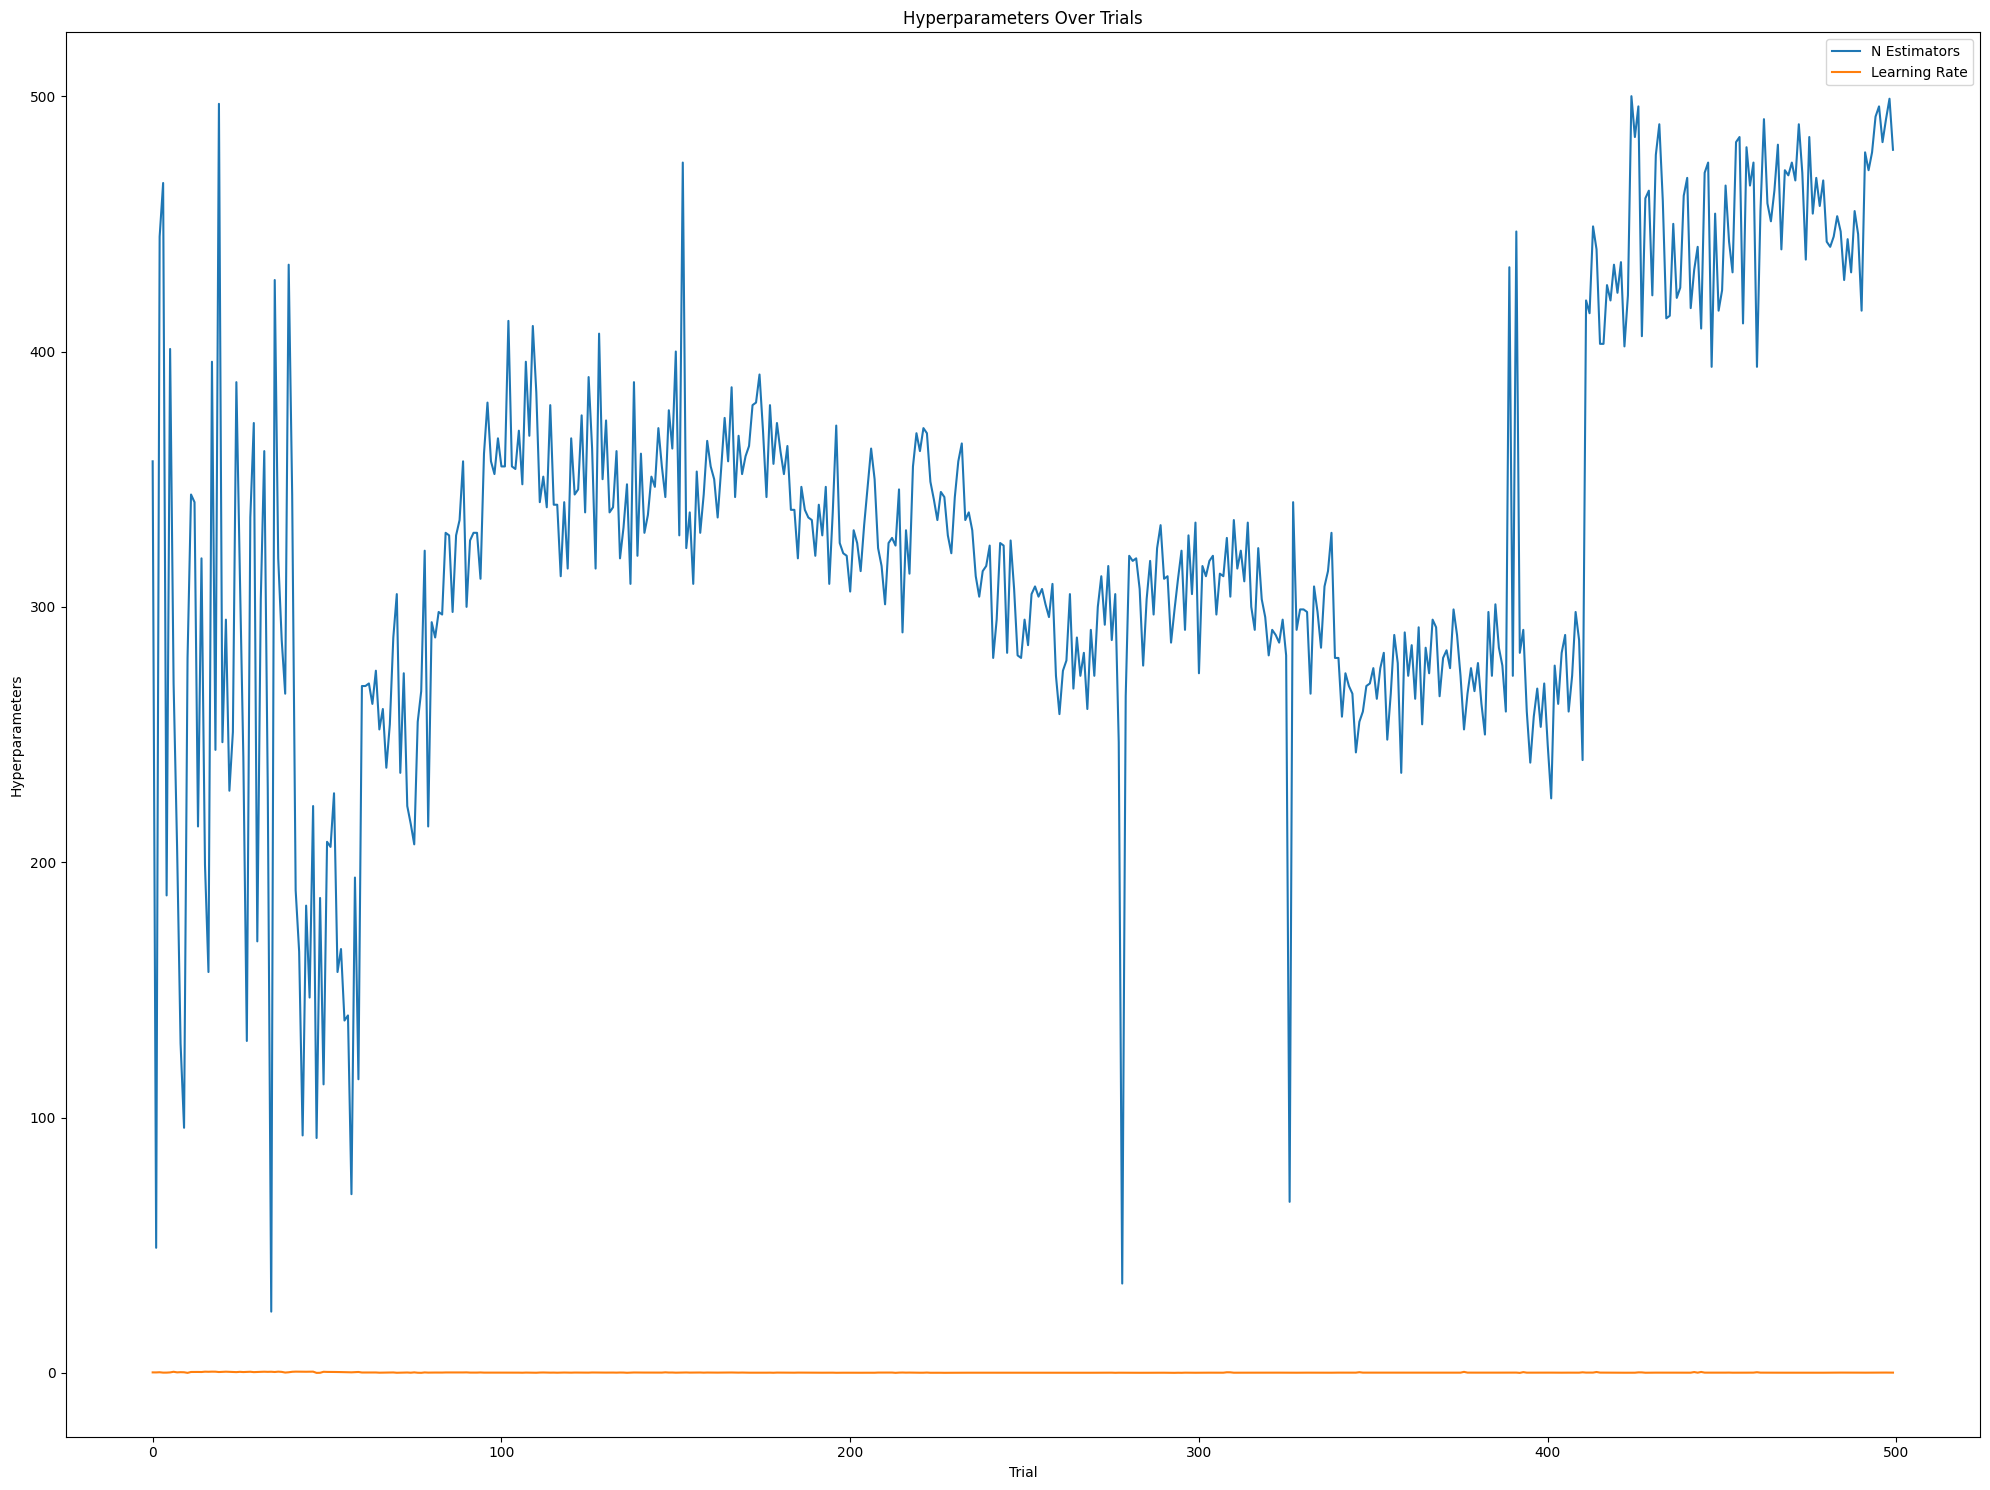

In [15]:
plt.figure(figsize=(20, 15))
plt.plot(df['Trial'], df['Params'].apply(lambda x: x['n_estimators']), label='N Estimators')
plt.plot(df['Trial'], df['Params'].apply(lambda x: x['learning_rate']), label='Learning Rate')
plt.xlabel('Trial')
plt.ylabel('Hyperparameters')
plt.title('Hyperparameters Over Trials')
plt.legend()
plt.tight_layout()
plt.savefig(f'{plots_dir}HyperparametersOverTrials.pdf', bbox_inches='tight')
plt.show()

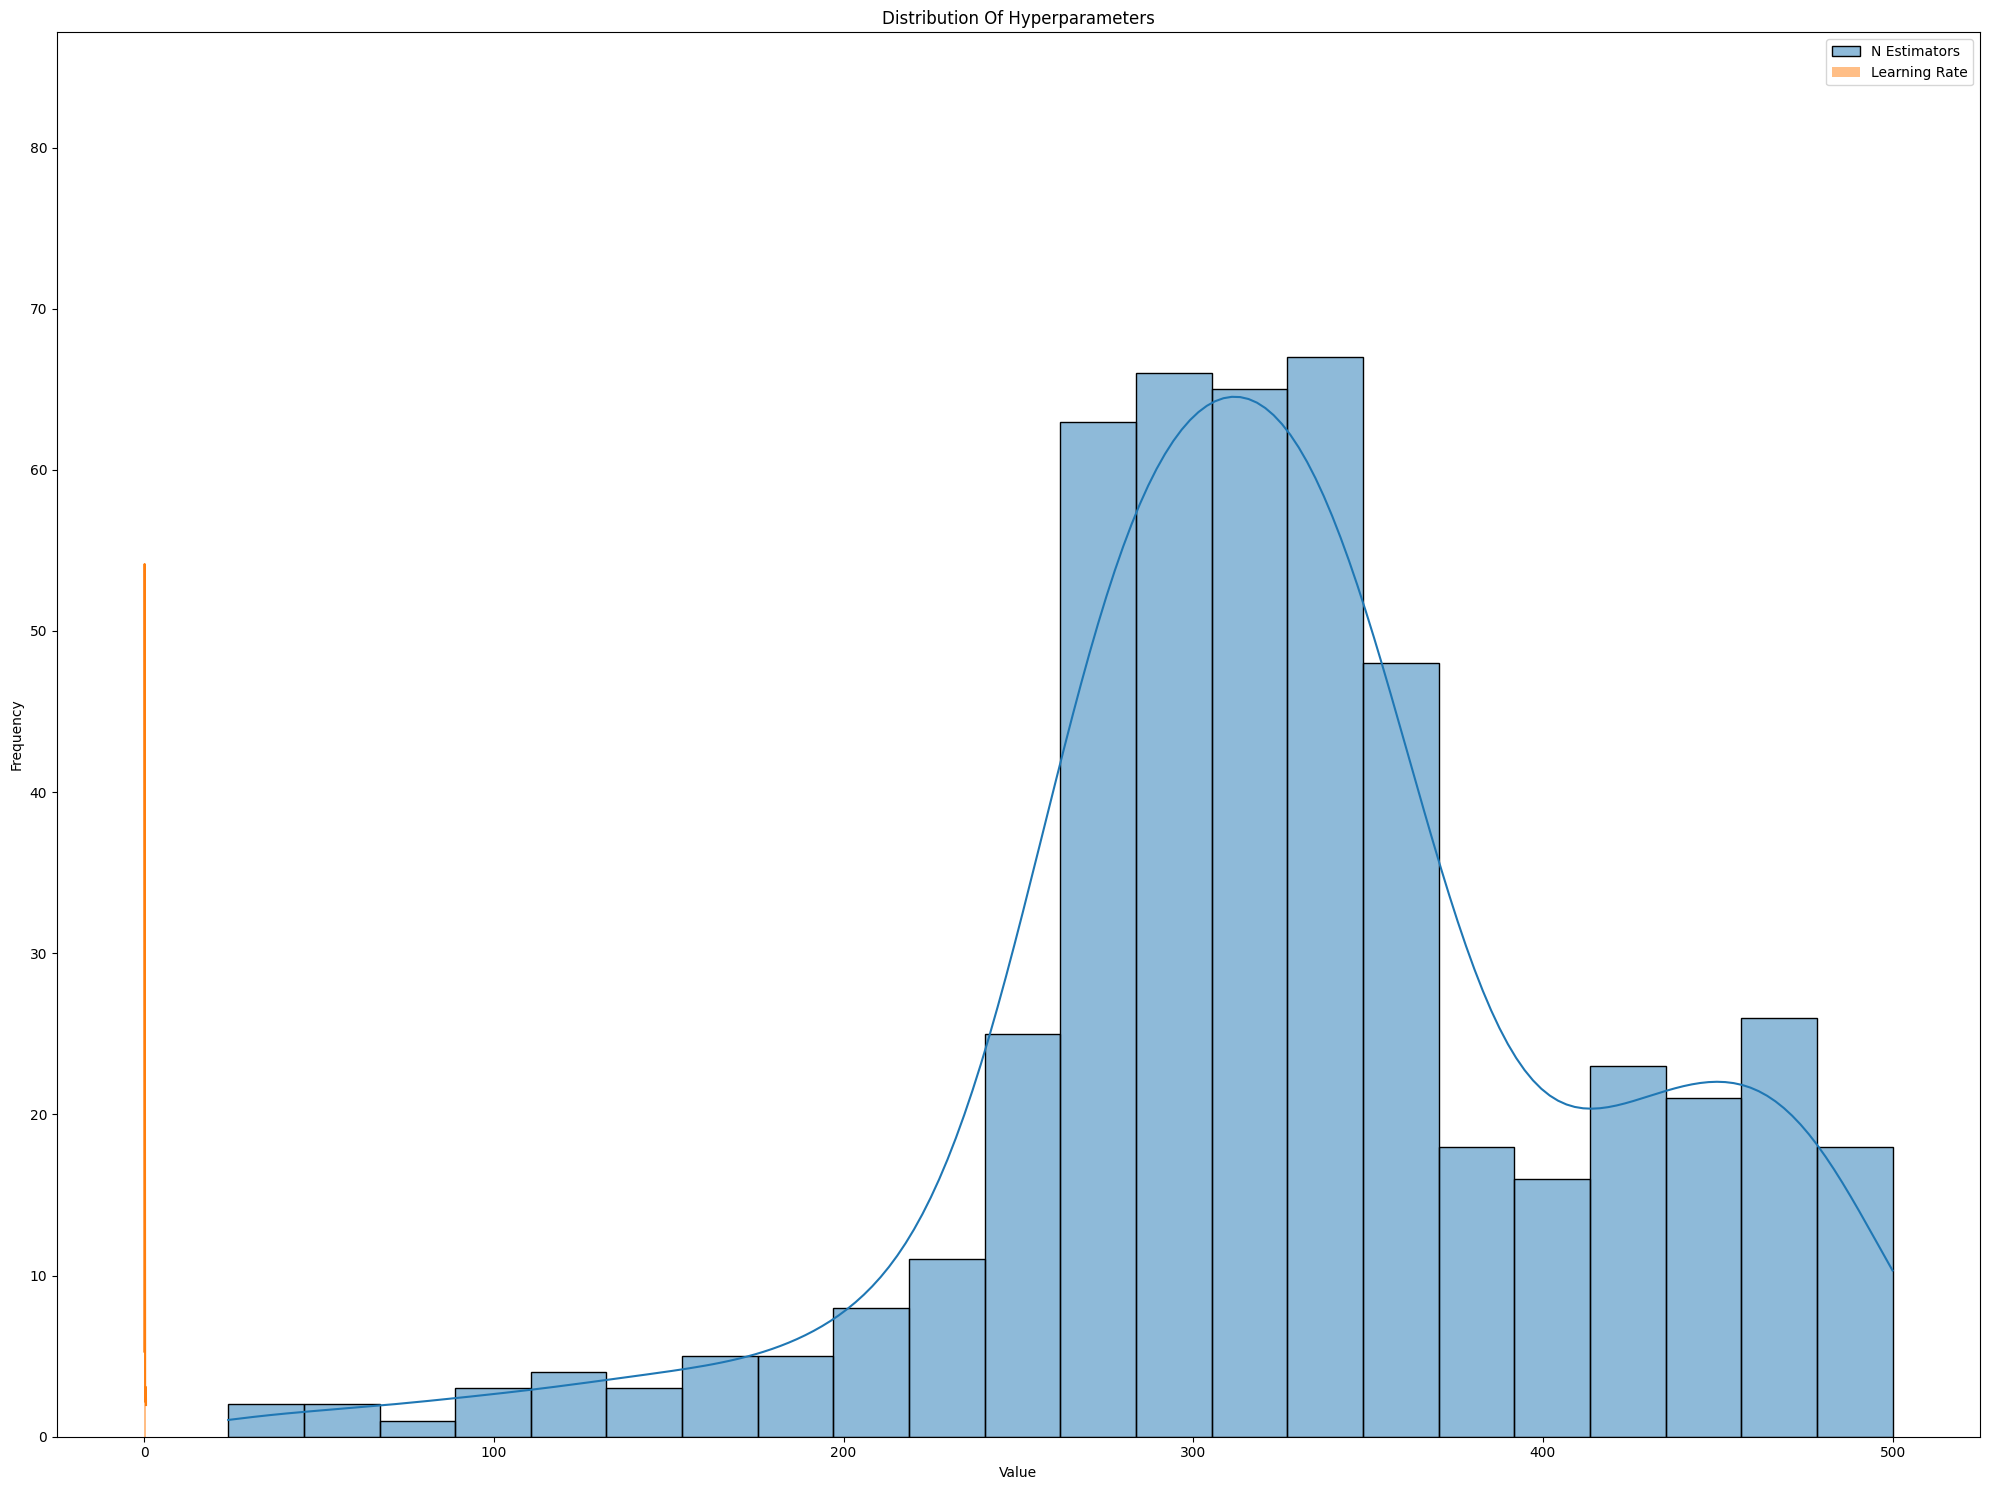

In [16]:
plt.figure(figsize=(20, 15))
sns.histplot(df['Params'].apply(lambda x: x['n_estimators']), kde=True, label='N Estimators')
sns.histplot(df['Params'].apply(lambda x: x['learning_rate']), kde=True, label='Learning Rate')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution Of Hyperparameters')
plt.legend()
plt.tight_layout()
plt.savefig(f'{plots_dir}DistributionOfHyperparameters.pdf', bbox_inches='tight')
plt.show()

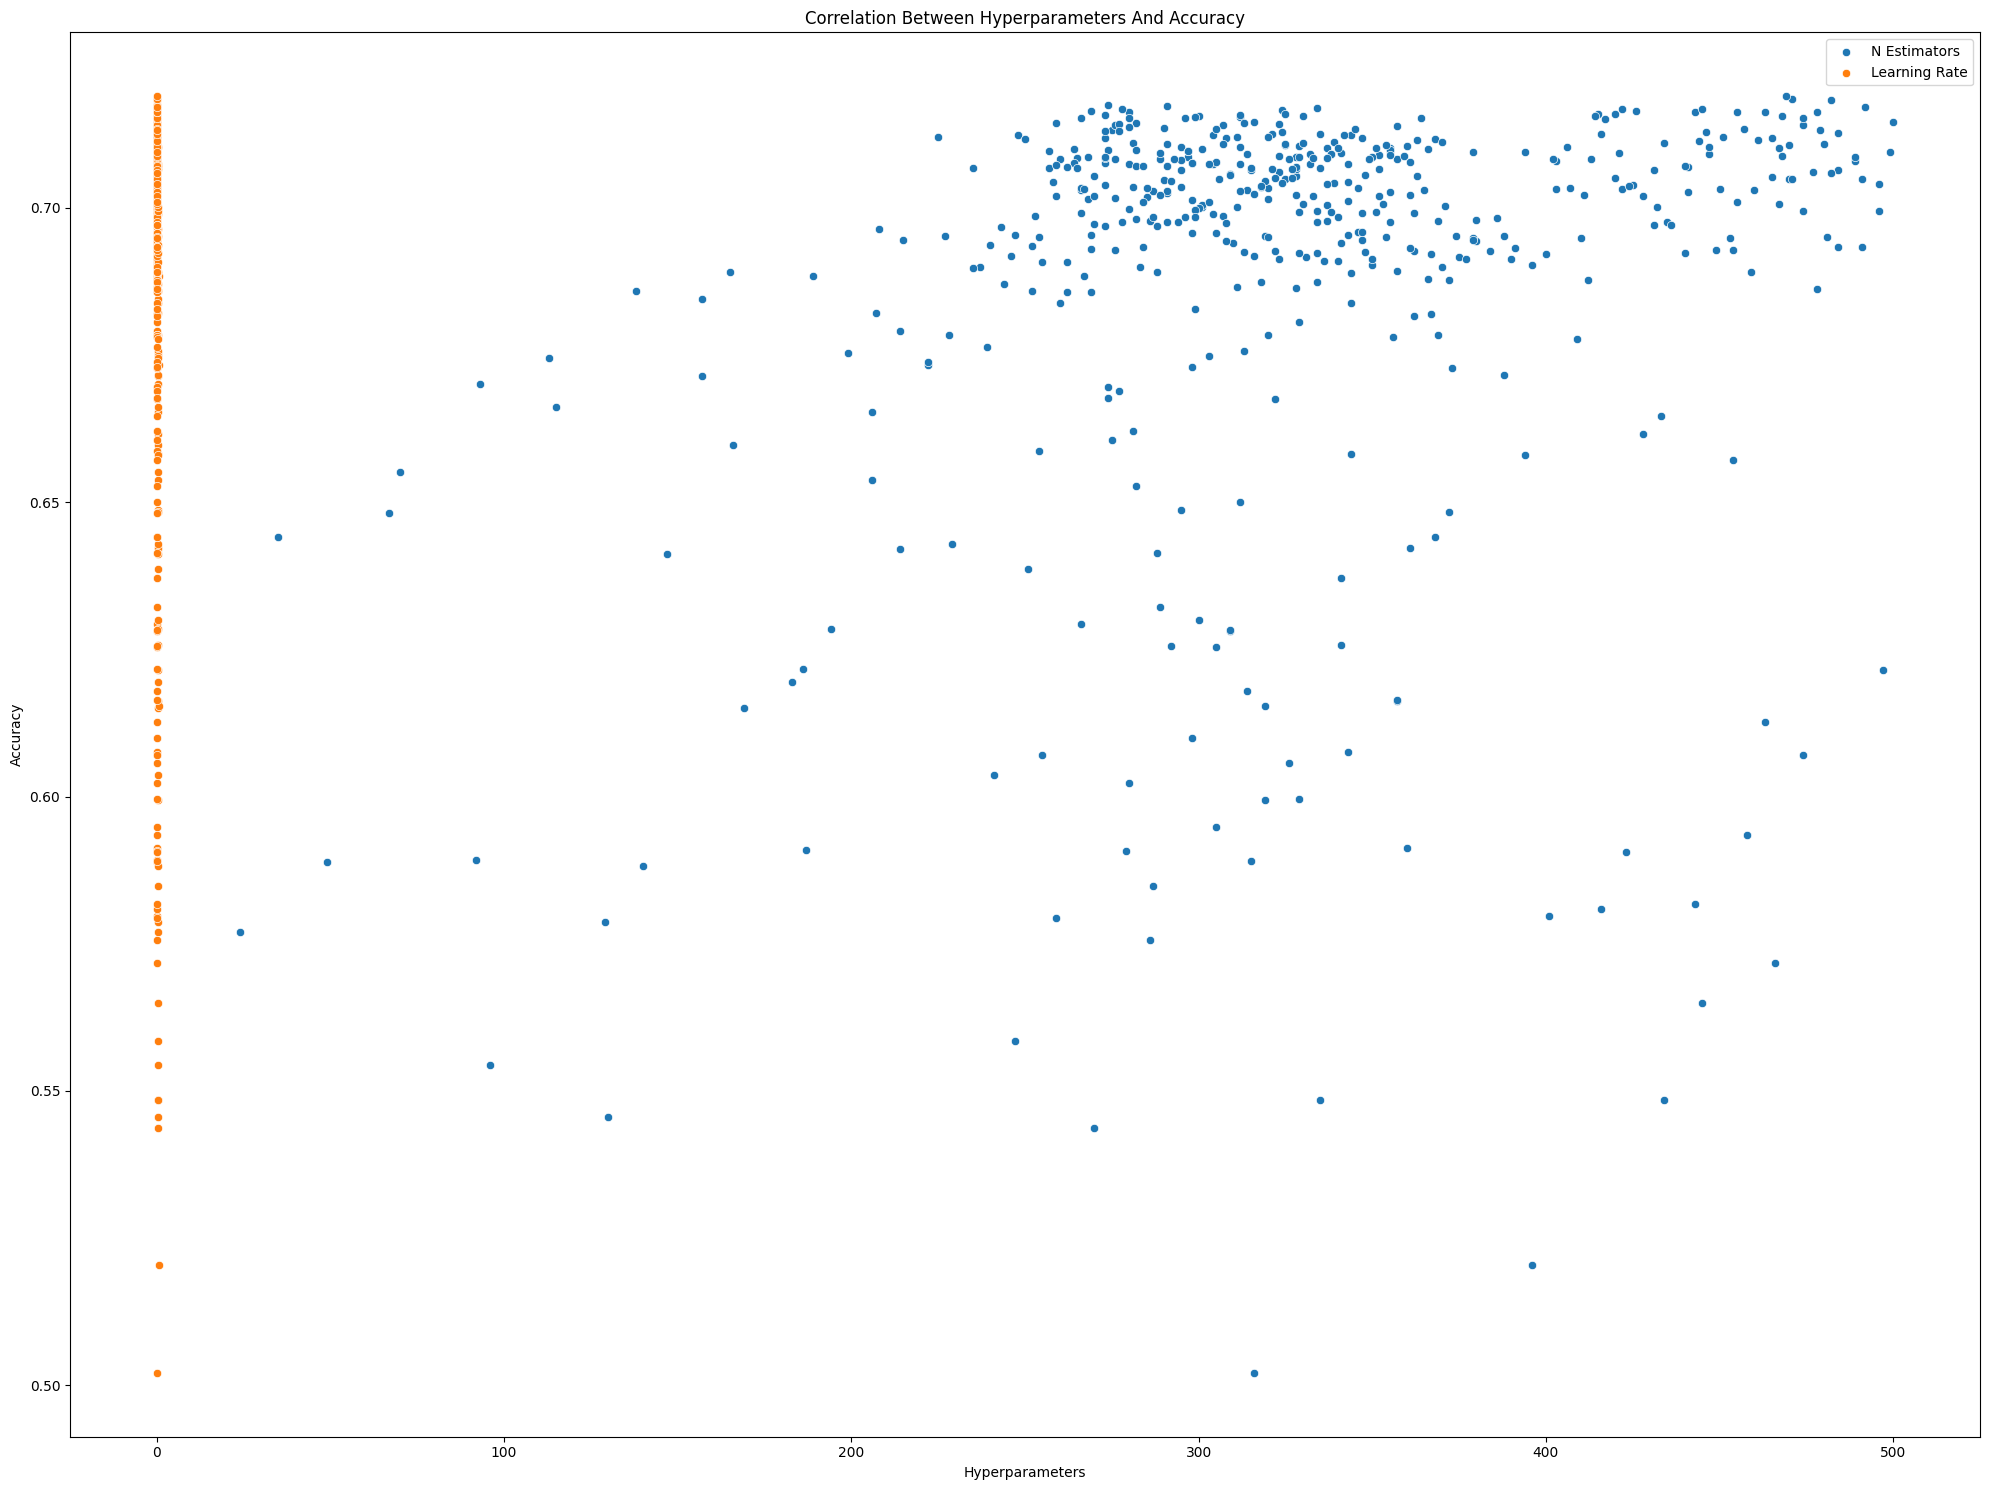

In [17]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x=df['Params'].apply(lambda x: x['n_estimators']), y=df['Accuracy'], label='N Estimators')
sns.scatterplot(x=df['Params'].apply(lambda x: x['learning_rate']), y=df['Accuracy'], label='Learning Rate')
plt.xlabel('Hyperparameters')
plt.ylabel('Accuracy')
plt.title('Correlation Between Hyperparameters And Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig(f'{plots_dir}CorrelationBetweenHyperparametersAndAccuracy.pdf', bbox_inches='tight')
plt.show()

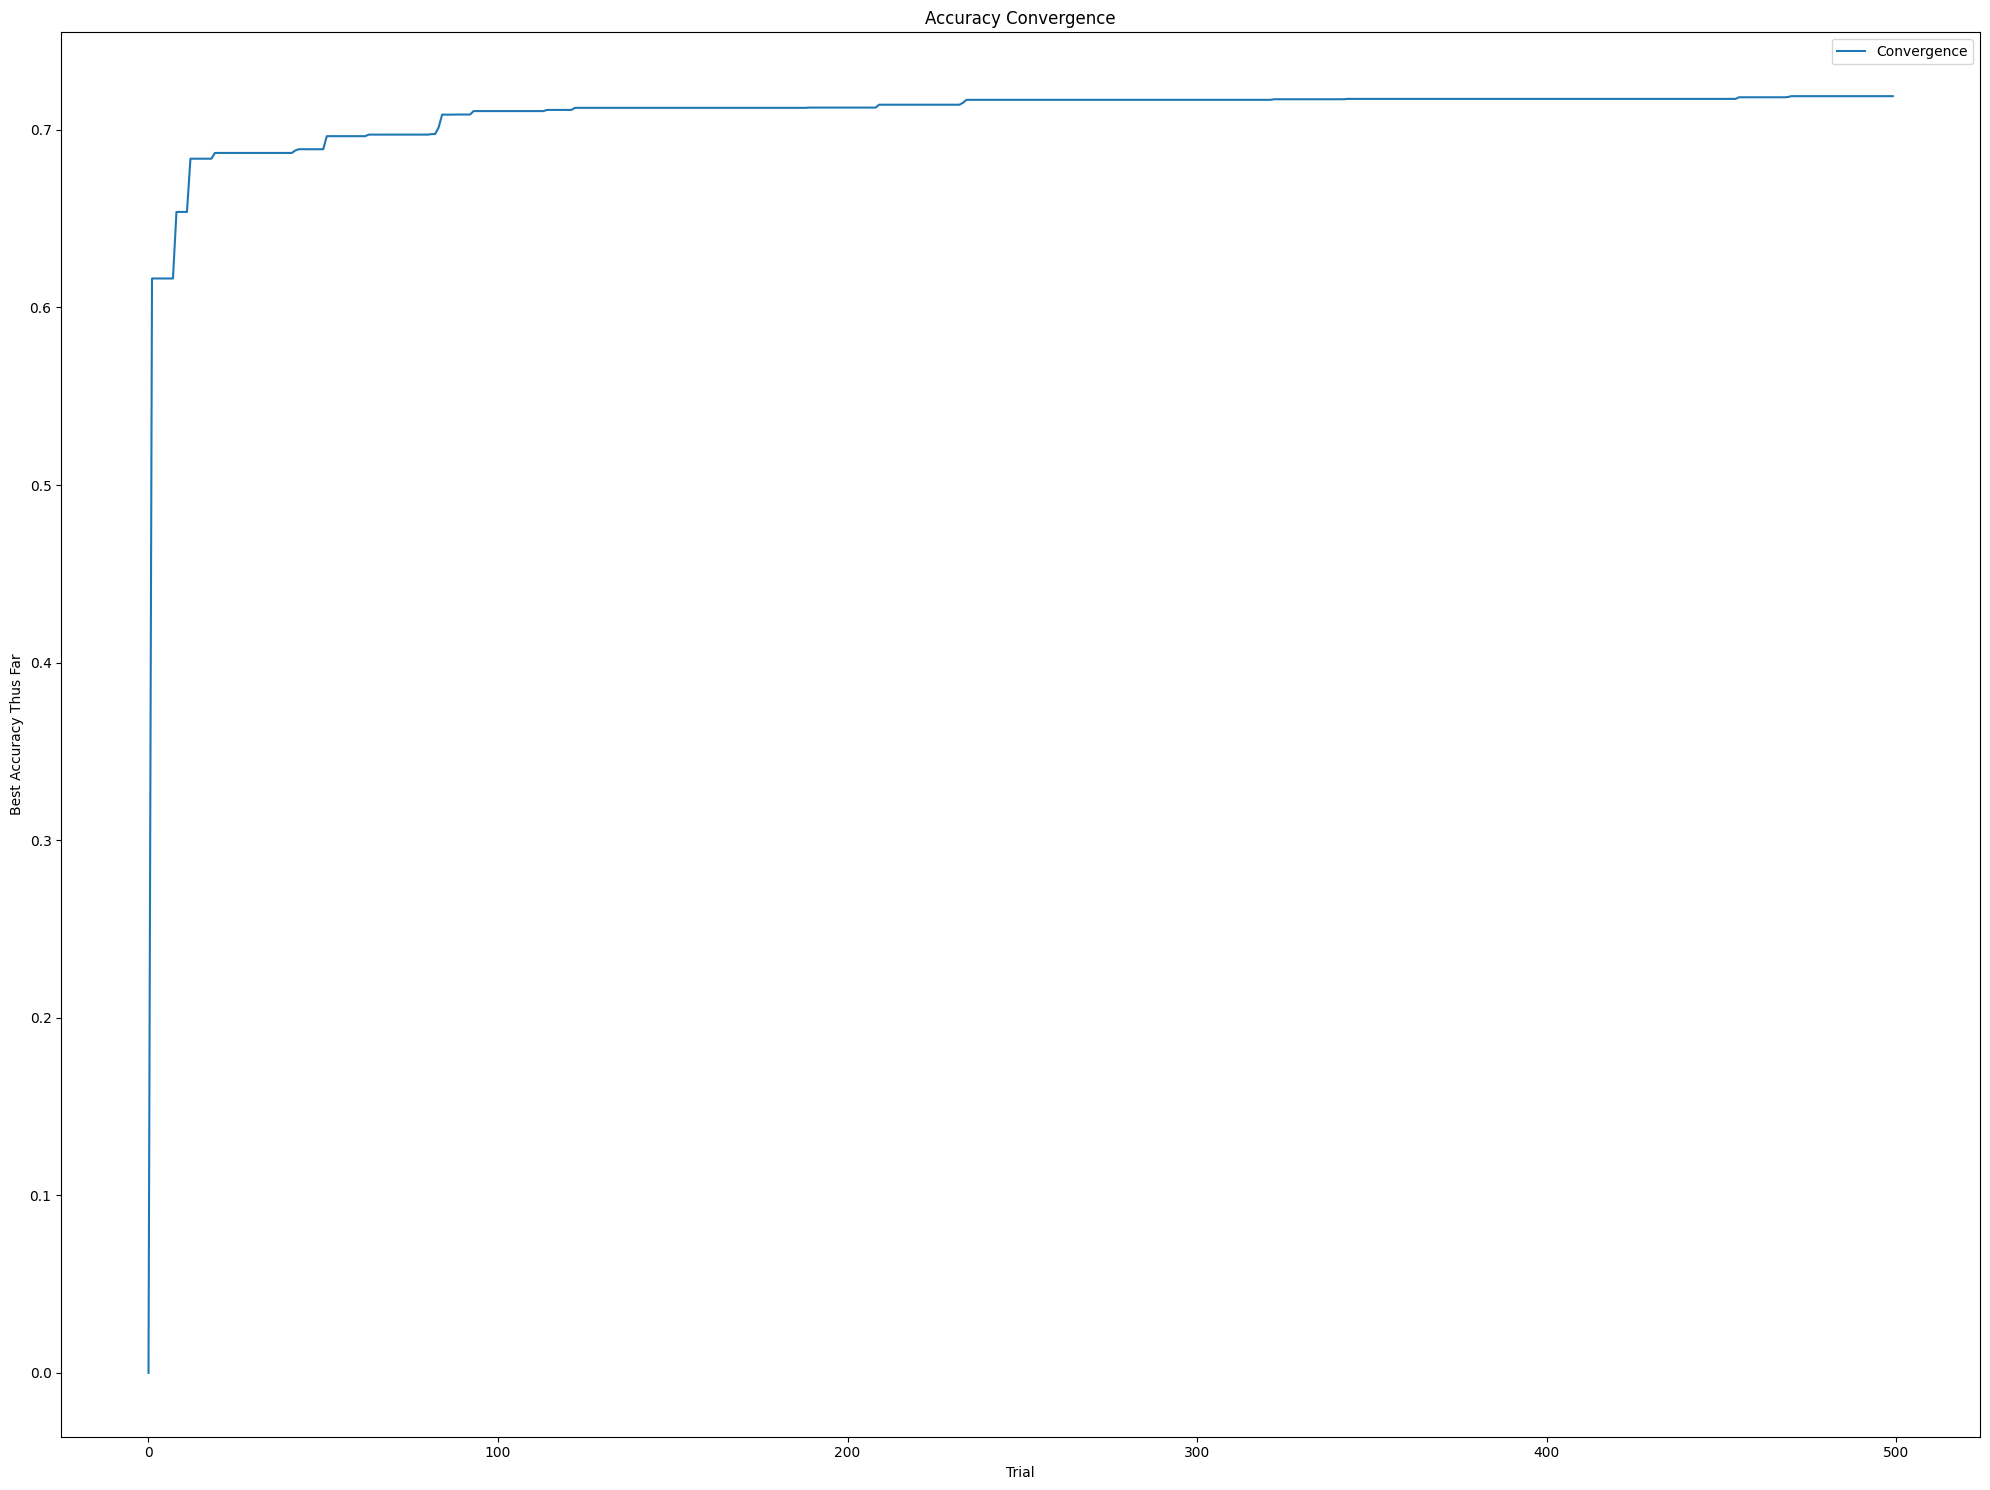

In [18]:
plt.figure(figsize=(20, 15))
plt.plot(df['Trial'], df['BestAccuracy'], label='Convergence')
plt.xlabel('Trial')
plt.ylabel('Best Accuracy Thus Far')
plt.title('Accuracy Convergence')
plt.legend()
plt.tight_layout()
plt.savefig(f'{plots_dir}AccuracyConvergenceCurve.pdf', bbox_inches='tight')
plt.show()

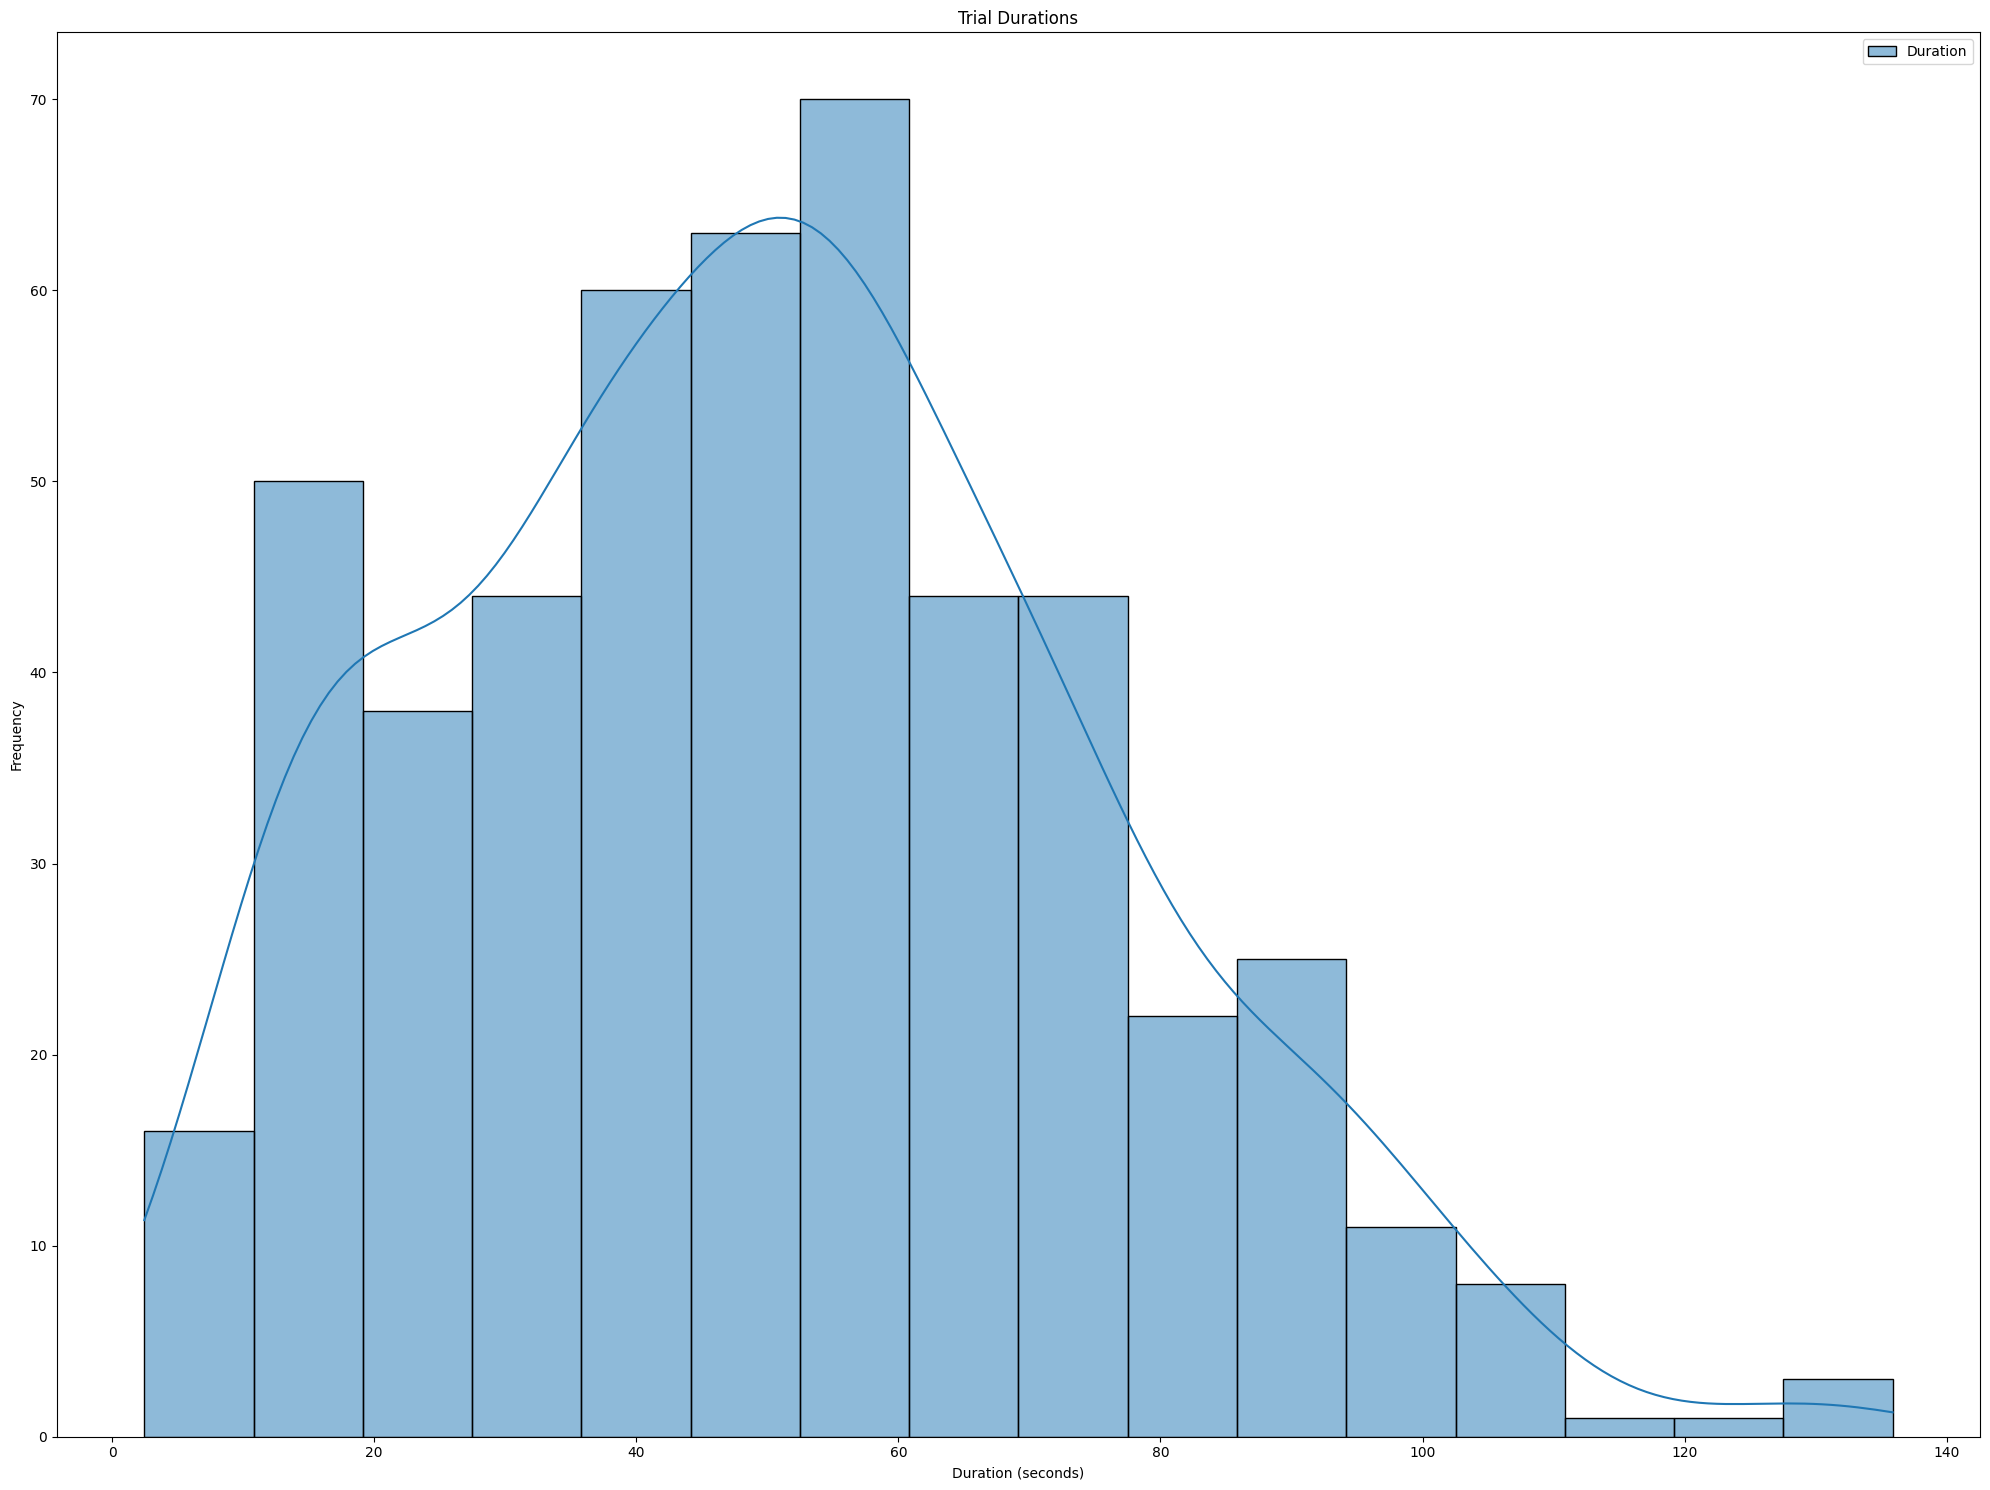

In [19]:
plt.figure(figsize=(20, 15))
sns.histplot(df['Duration'], kde=True, label='Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Trial Durations')
plt.legend()
plt.tight_layout()
plt.savefig(f'{plots_dir}TrialDurations.pdf', bbox_inches='tight')
plt.show()

In [20]:
params_df = df['Params'].apply(pd.Series)
params_df['Accuracy'] = df['Accuracy']

In [21]:
mapping = {
    'n_estimators': 'N Estimators',
    'max_depth': 'Max Depth',
    'num_leaves': 'Nummber Of Leaves',
    'learning_rate': 'Learning Rate',
    'min_child_samples': 'Min Child Samples',
    'subsample': 'Subsample',
    'colsample_bytree': 'Colsample Bytree',
    'gamma': 'Gamma',
    'lambda': 'Lambda',
    'alpha': 'Alpha',
    'scale_pos_weight': 'Scale Pos Weight'
}

In [22]:
params_df.rename(columns=mapping, inplace=True)